Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [64]:
import pandas as pd
import numpy as np
import itertools
import pprint

# used for the graphs
import seaborn as sns
import os
sns.set(font_scale = 1.2)

# used for plotting
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib

# setting font to 'Times New Roman'
matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 20})
%matplotlib inline

Global Variables and Constants

In [30]:
PLOT_DIR_NAME = "Project1-descriptive-data-analysis-plots-Amirreza"
PLOT_COLOR = "forestgreen"
if not os.path.isdir(PLOT_DIR_NAME):
    os.mkdir(PLOT_DIR_NAME)

Importing Data

In [31]:
file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)

c:\Users\Amirreza\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types

In [32]:
# fixing dtypes
data_df.postleitzahl = data_df.postleitzahl.astype('str')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
# data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

# adding variable for is_local
mask = data_df.gemeinde.isna() & data_df.bezirk.isna() & data_df.bundesland.isna()
data_df["is_local_resident"] = True
data_df.loc[mask, "is_local_resident"] = False

# adding variable for age
age =  data_df["zeit"].dt.year - pd.to_datetime(data_df['geburtsjahr'], format='%Y').dt.year
data_df["age"] = age.astype("Int64")

# adding variable for age group
data_df["age_group"] = pd.cut(data_df.age, bins=[0,12,19,65,130],labels=['children', 'teenager', 'adult','65 over'])
data_df["age_group"] = data_df.age_group.astype(str)

#replacing nans for variables

data_df.loc[data_df.geschlecht.isna() == True, 'raucher'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'blutzucker_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'cholesterin_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'in_behandlung'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'befinden'] = "unknown"
data_df.loc[data_df.age_group == "nan", 'age_group'] = "unknown"

data_df.loc[mask, 'gemeinde'] = "not applicable"
data_df.loc[mask, 'bezirk'] = "not applicable"
data_df.loc[mask, 'bundesland'] = "not applicable"
data_df.loc[mask, 'postleitzahl'] = "not applicable"
data_df.loc[data_df.postleitzahl == "nan", 'postleitzahl'] = "unknown"

# creating variables for missing values in bp

data_df["is_missing_schaetzwert_bp_sys"] = False
data_df.loc[data_df.schaetzwert_bp_sys.isna() == True, "is_missing_schaetzwert_bp_sys"] = True
data_df["is_missing_schaetzwert_by_dia"] = False
data_df.loc[data_df.schaetzwert_by_dia.isna() == True, "is_missing_schaetzwert_by_dia"] = True

# removing useless variables
data_df.drop(data_df[data_df.age > 100].index, inplace=True)
data_df.drop(data_df[data_df.age < 15].index, inplace=True)

data_df.loc[data_df.geschlecht.isna() == True, 'geschlecht'] = "unknown"


,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age,age_group
0,11519,2006-04-27 10:49:12,2,8054,Seiersberg,Graz-Umgebung,Steiermark,1,1967,m,False,True,False,False,142.0,89.0,179,111,39,adult
1,11520,2006-04-27 11:10:46,2,8403,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1,1968,m,False,False,False,False,140.0,70.0,109,80,38,adult
2,11521,2006-04-27 11:21:09,2,8020,Graz - Gries,Graz(Stadt),Steiermark,1,1973,m,True,False,False,False,130.0,75.0,128,108,33,adult
3,11522,2006-04-27 11:32:59,1,8044,Graz - Mariatrost,Graz(Stadt),Steiermark,1,1961,m,False,False,False,False,100.0,80.0,130,90,45,adult
4,11524,2006-04-27 12:01:48,2,8010,Graz - Geidorf,Graz(Stadt),Steiermark,2,1978,f,False,False,False,False,140.0,70.0,144,103,28,adult


In [6]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  20


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia', 'age', 'age_group'],
      dtype='object')

Missing Values

In [33]:
# Counts for missing values per column
data_df.isna().sum()

id                                0
zeit                              0
terminal                          0
postleitzahl                      0
gemeinde                          0
bezirk                            0
bundesland                        0
befinden                          0
geburtsjahr                      23
geschlecht                        0
raucher                           0
blutzucker_bekannt                0
cholesterin_bekannt               0
in_behandlung                     0
schaetzwert_bp_sys               27
schaetzwert_by_dia               35
messwert_bp_sys                   0
messwert_bp_dia                   0
is_local_resident                 0
age                              23
age_group                         0
is_missing_schaetzwert_bp_sys     0
is_missing_schaetzwert_by_dia     0
dtype: int64

In [6]:
# identifying all rows in total with missing values

rows_with_nan = data_df[data_df.isna().any(axis=1)]
rows_with_nan.shape

(384, 20)

In [7]:
# dropping nan values
data_df_wo_nan = data_df.dropna()
data_df_wo_nan.shape

(16002, 20)

Statistics

In [8]:
summary = round(data_df.describe(), 2)
summary

,id,terminal,postleitzahl,befinden,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age
count,16386.00,16386.00,16052.00,16363.00,16363.00,16341.00,16330.00,16386.00,16386.00,16363.00
mean,23172.17,1.92,7939.79,1.82,1963.87,122.41,79.86,124.10,82.04,42.13
std,6556.96,0.82,1663.22,0.75,18.53,16.94,9.96,19.68,14.64,18.53
min,11519.00,1.00,1010.00,1.00,1880.00,34.00,30.00,43.00,27.00,0.00
25%,17978.25,1.00,8051.00,1.00,1950.00,115.00,75.00,110.00,73.00,27.00
50%,23345.50,2.00,8401.00,2.00,1962.00,120.00,80.00,123.00,81.00,44.00
75%,28781.75,3.00,8641.00,2.00,1979.00,130.00,85.00,137.00,90.00,56.00
max,34703.00,3.00,9991.00,5.00,2006.00,299.00,212.00,217.00,197.00,126.00


Continuous Variables

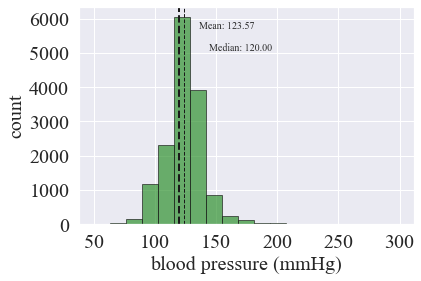

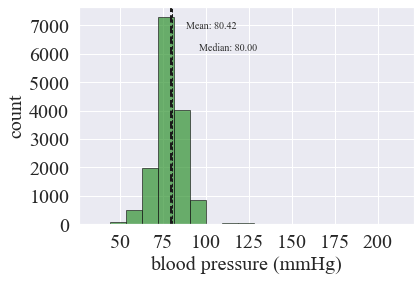

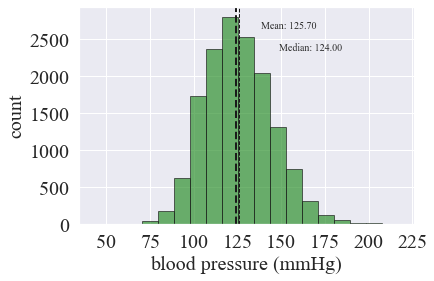

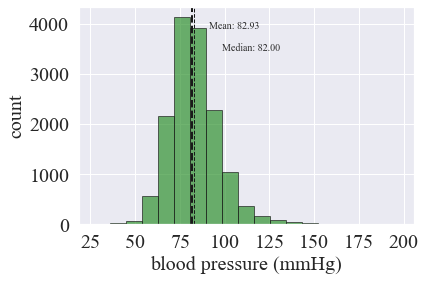

In [45]:
def histo_plt(col):
    min_value = data_df[col].min()
    max_value = data_df[col].max()
    bins = np.linspace(min_value,max_value,20)

    result = plt.hist(data_df[col], bins = bins, color=PLOT_COLOR, edgecolor='k', alpha=0.65)
    plt.axvline(data_df[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(data_df[col].median(), color='k', linestyle='dashed', linewidth=2)

    min_ylim, max_ylim = plt.ylim()
    plt.text(data_df[col].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df[col].mean()))
    plt.text(data_df[col].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(data_df[col].median()))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # plt.title("Histogram of schaetzwert_bp_sys")
    plt.xlabel('blood pressure (mmHg)', fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.savefig(os.path.join(PLOT_DIR_NAME, col + "_Hist.pdf"), dpi=180, bbox_inches='tight')
    plt.show()

# Histogram Plot of the schaetzwert_bp_sys

histo_plt('schaetzwert_bp_sys')

# Histogram Plot of the schaetzwert_by_dia

histo_plt('schaetzwert_by_dia')

# Histogram Plot of the messwert_bp_sys

histo_plt('messwert_bp_sys')

# Histogram Plot of the messwert_bp_dia

histo_plt('messwert_bp_dia')


Grouby Histograms

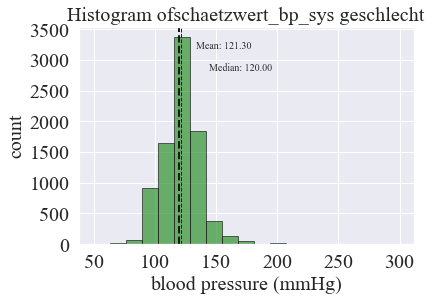

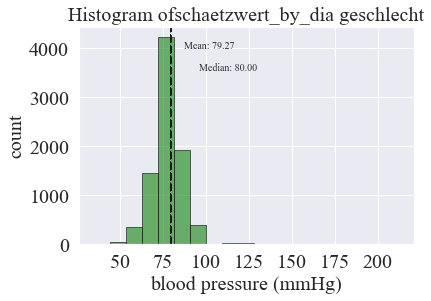

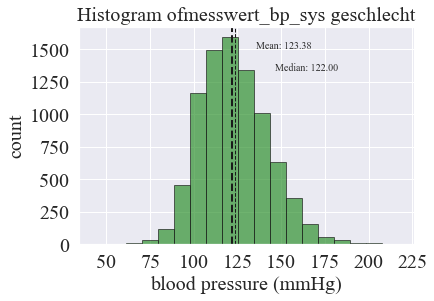

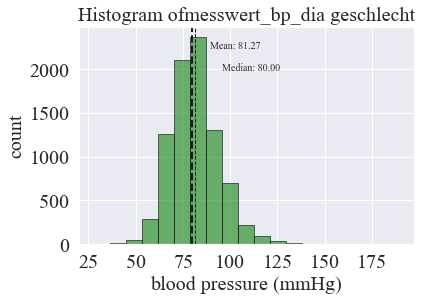

In [43]:
def histo_plt(col, group, value):
    values = data_df.loc[data_df[group] == value, col]
    min_value = values.min()
    max_value = values.max()
    bins = np.linspace(min_value,max_value,20)

    result = plt.hist(values, bins = bins, color=PLOT_COLOR, edgecolor='k', alpha=0.65)
    plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(values.median(), color='k', linestyle='dashed', linewidth=2)

    min_ylim, max_ylim = plt.ylim()
    plt.text(values.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(values.mean()))
    plt.text(values.median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(values.median()))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # plt.title("Histogram of schaetzwert_bp_sys")
    plt.title("Histogram of" + col + " " + group , fontsize=20)
    plt.xlabel('blood pressure (mmHg)', fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.savefig(os.path.join(PLOT_DIR_NAME, col + group + "_Hist.pdf"), dpi=180, bbox_inches='tight')
    plt.show()


# Histogram Plot of the schaetzwert_bp_sys group by specific column and value

histo_plt('schaetzwert_bp_sys', 'geschlecht' , 'f')

# Histogram Plot of the schaetzwert_by_dia group by specific column and value

histo_plt('schaetzwert_by_dia', 'geschlecht' , 'f')

# Histogram Plot of the messwert_bp_sys group by specific column and value

histo_plt('messwert_bp_sys', 'geschlecht' , 'f')

# Histogram Plot of the messwert_bp_dia group by specific column and value

histo_plt('messwert_bp_dia', 'geschlecht' , 'f')

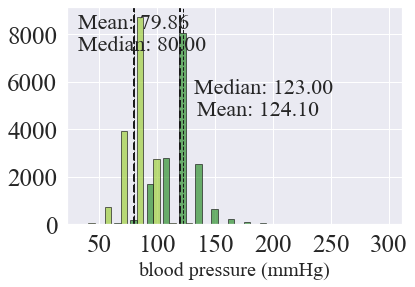

In [27]:
# Histogram Plot of the schaetzwert_bp_sys vs schaetzwert_by_dia Alternatively
min_value = data_df['schaetzwert_bp_sys'].min()
max_value = data_df['schaetzwert_bp_sys'].max()
bins = np.linspace(min_value,max_value,20)

result = plt.hist([data_df['schaetzwert_bp_sys'],data_df['schaetzwert_by_dia']], bins = bins, color=[PLOT_COLOR,'yellowgreen'], edgecolor='k', alpha=0.65)
plt.axvline(data_df['schaetzwert_bp_sys'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['schaetzwert_bp_sys'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['schaetzwert_bp_sys'].mean()*1.1, max_ylim*0.5, 'Mean: {:.2f}'.format(data_df['messwert_bp_sys'].mean()))
plt.text(data_df['schaetzwert_bp_sys'].median()*1.1, max_ylim*0.6, 'Median: {:.2f}'.format(data_df['messwert_bp_sys'].median()))

plt.axvline(data_df['schaetzwert_by_dia'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['schaetzwert_by_dia'].median(), color='k', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


min_ylim, max_ylim = plt.ylim()
plt.text(data_df['schaetzwert_by_dia'].mean()*0.4, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['schaetzwert_by_dia'].mean()))
plt.text(data_df['schaetzwert_by_dia'].median()*0.4, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['schaetzwert_by_dia'].median()))
plt.savefig(os.path.join(PLOT_DIR_NAME, "Mix_Hist.pdf"), dpi=180, bbox_inches='tight')
plt.xlabel('blood pressure (mmHg)', fontsize=20)
# plt.legend(["schaetzwert_bp_sys", "schaetzwert_by_dia"], [PLOT_COLOR,'yellowgreen'])
plt.show()


In [ ]:
# plot distribution of values in Marks column
# data_df['schaetzwert_bp_sys'].plot(kind='kde')
# data_df.groupby('raucher')['schaetzwert_bp_sys'].plot(kind='kde')


Nominal and Ordinal

f          8463
m          6401
unknown      23
Name: geschlecht, dtype: int64


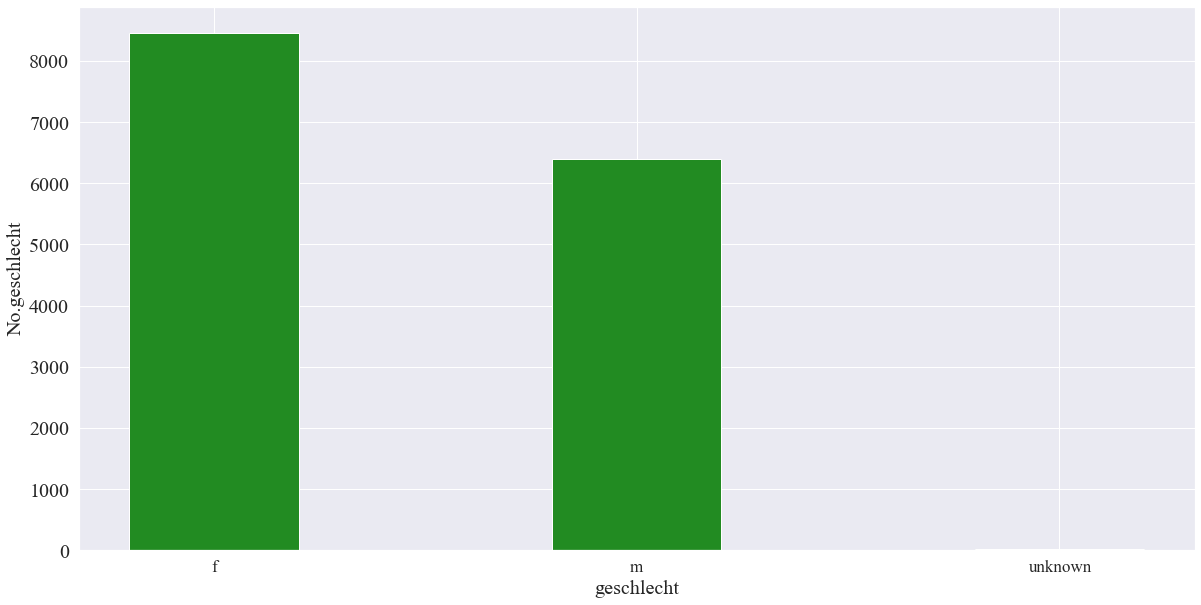

<Figure size 720x432 with 0 Axes>

Steiermark          13035
Wien                  464
Niederösterreich      418
not applicable        287
Oberösterreich        210
Kärnten               184
Burgenland            117
Salzburg               80
Tirol                  64
Vorarlberg             28
Name: bundesland, dtype: int64


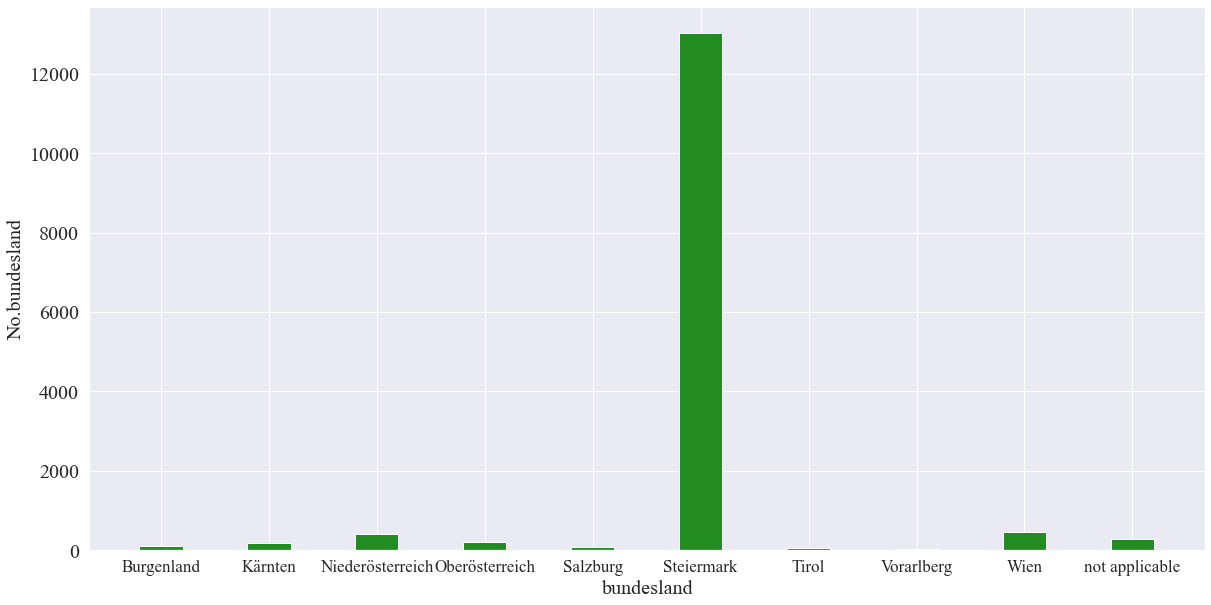

<Figure size 720x432 with 0 Axes>

False      12441
True        2423
unknown       23
Name: raucher, dtype: int64


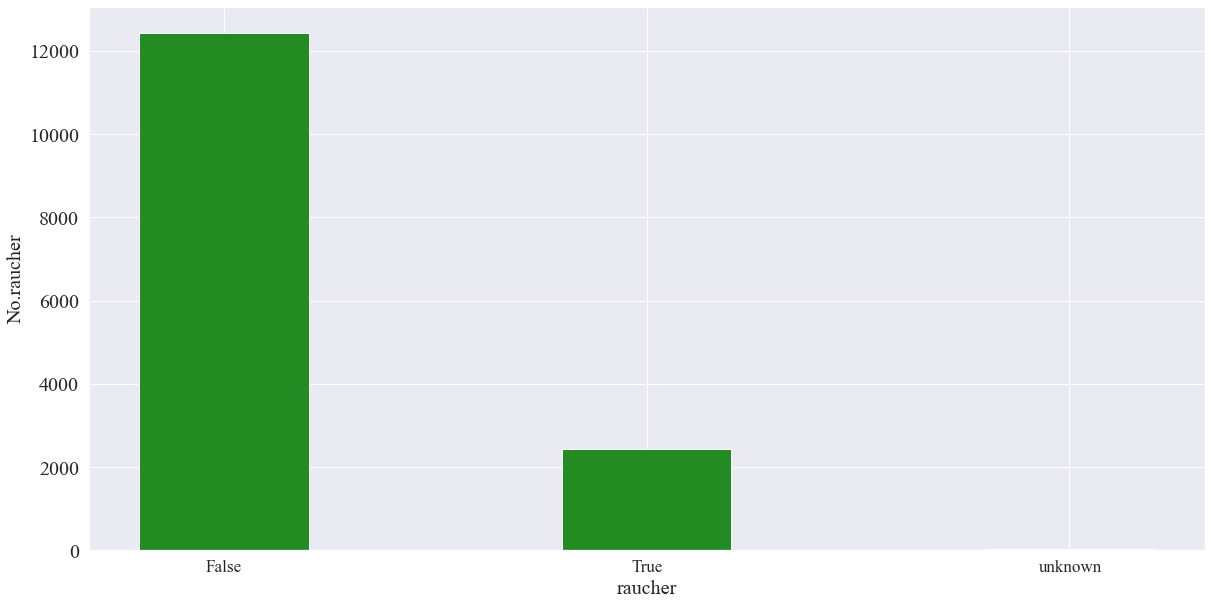

<Figure size 720x432 with 0 Axes>

False      9195
True       5669
unknown      23
Name: cholesterin_bekannt, dtype: int64


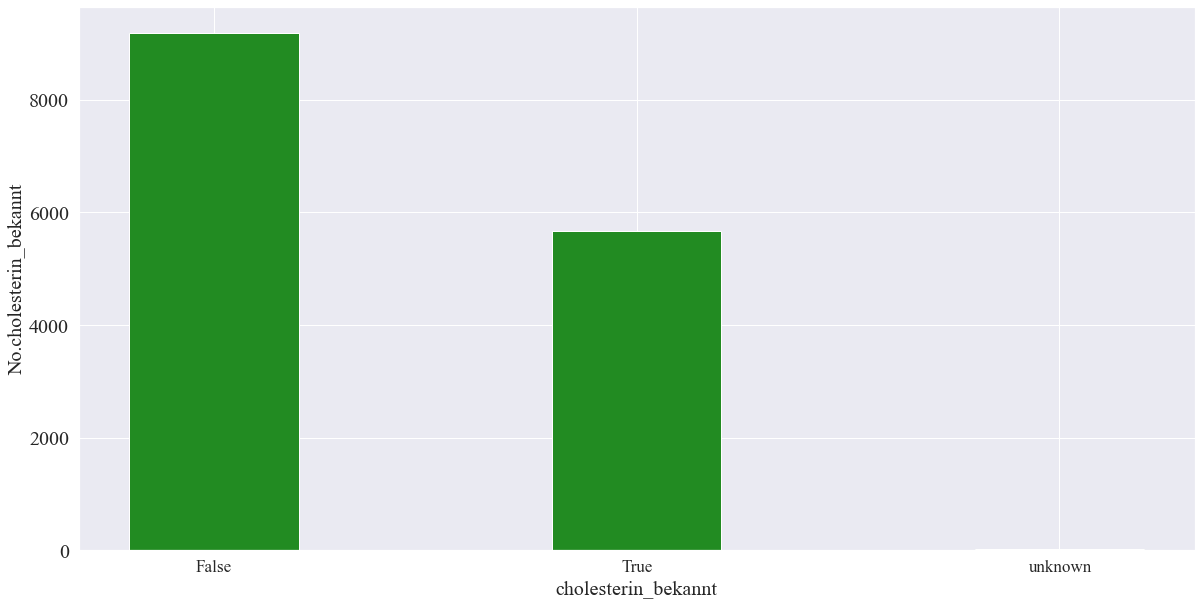

<Figure size 720x432 with 0 Axes>

False      12844
True        2020
unknown       23
Name: in_behandlung, dtype: int64


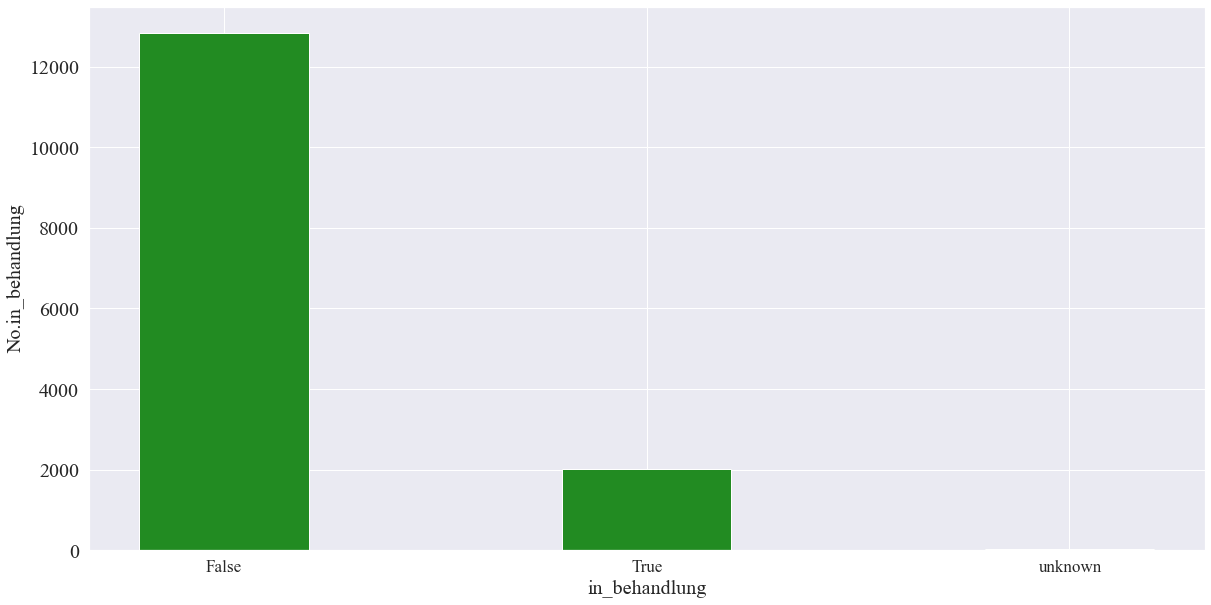

<Figure size 720x432 with 0 Axes>

2.0        7406
1.0        5123
3.0        2097
4.0         177
5.0          61
unknown      23
Name: befinden, dtype: int64


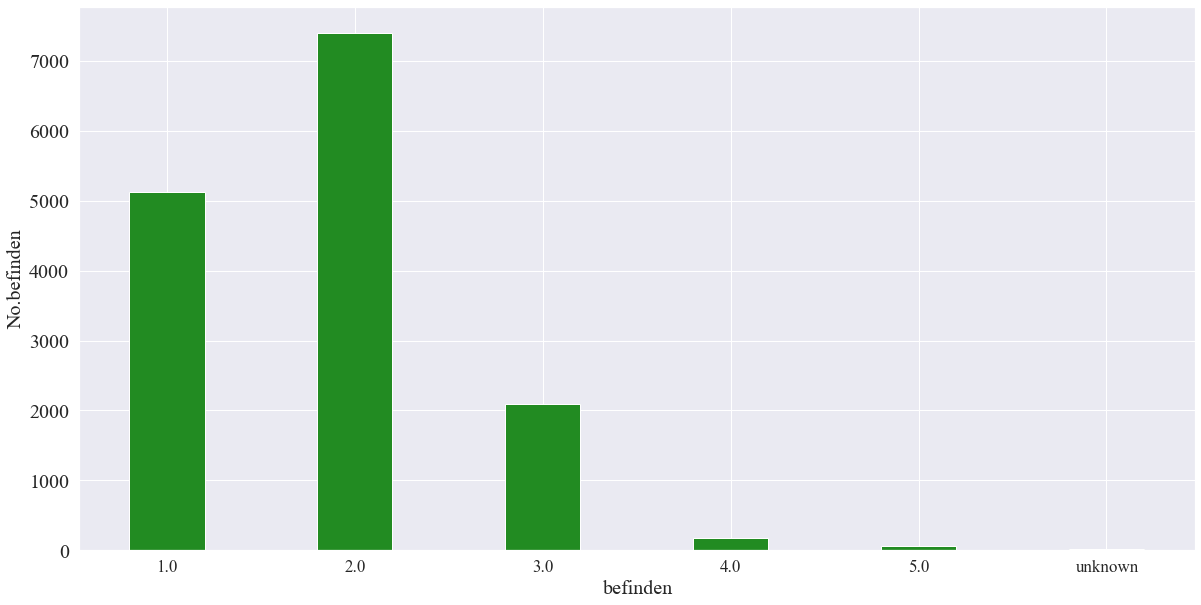

<Figure size 720x432 with 0 Axes>

In [85]:
def bar_plt(col):
    print(data_df[col].value_counts())
    data_df[col] = data_df[col].astype(str)
    values, counts = np.unique(data_df[col], return_counts=True)
    plt.bar(values, counts, color =PLOT_COLOR,
            width = 0.4)

    plt.xlabel(col, fontsize=20)
    plt.ylabel("No." + col, fontsize=20)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=20)
    plt.figure(figsize=(10,6))
    # plt.title("Bar plot of sex distribution")
    plt.savefig(os.path.join(PLOT_DIR_NAME, col + "distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
    plt.show()

# creating the bar plot Genders

bar_plt('geschlecht')

# creating the bar plot states

bar_plt('bundesland')

# creating the bar plot smoking

bar_plt('raucher')

bar_plt('cholesterin_bekannt')

bar_plt('in_behandlung')

# creating the bar plot Genders

bar_plt('befinden')

Bivariate analysis correlation 

7808
6080
1382
1093


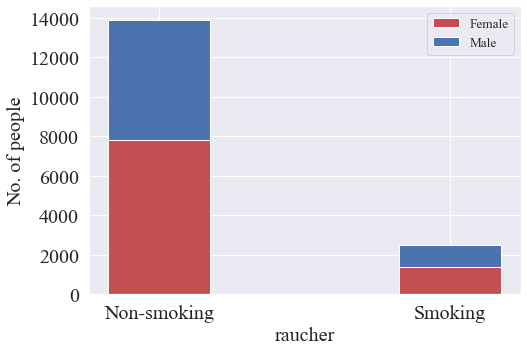

5775
4861
3415
2312


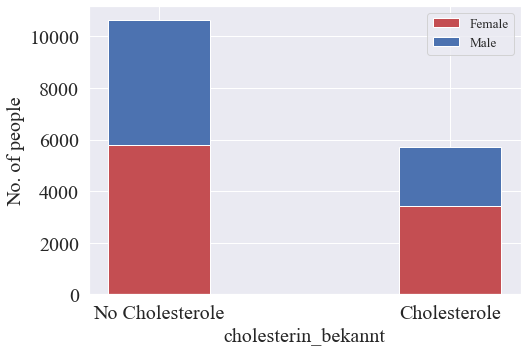

10412
3499
1887
588


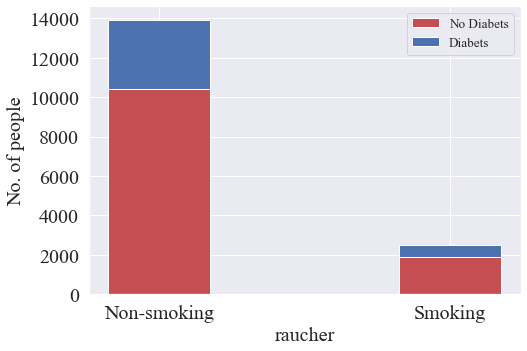

In [12]:

#Mosaic plot of smoking and gender
print(len(data_df[(data_df["geschlecht"]=="f") & (data_df["raucher"] == False)]))
print(len(data_df[(data_df["geschlecht"]=="m") & (data_df["raucher"] == False)]))
print(len(data_df[(data_df["geschlecht"]=="f") & (data_df["raucher"] == True)]))
print(len(data_df[(data_df["geschlecht"]=="m") & (data_df["raucher"] == True)]))

N = 2
menMeans = (len(data_df[(data_df["geschlecht"]=="f") & (data_df["raucher"] == False)]), len(data_df[(data_df["geschlecht"]=="f") & (data_df["raucher"] == True)])) 
womenMeans = (len(data_df[(data_df["geschlecht"]=="m") & (data_df["raucher"] == False)]), len(data_df[(data_df["geschlecht"]=="m") & (data_df["raucher"] == True)]))
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width, bottom=menMeans, color='b')


ax.set_xticks(ind, ('Non-smoking', 'Smoking'))
ax.legend(labels=['Female', 'Male'])

plt.xlabel("raucher", fontsize=20)
plt.ylabel("No. of people", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


#Mosaic plot of cholesterole and gender
print(len(data_df[(data_df["geschlecht"]=="f") & (data_df["cholesterin_bekannt"] == False)]))
print(len(data_df[(data_df["geschlecht"]=="m") & (data_df["cholesterin_bekannt"] == False)]))
print(len(data_df[(data_df["geschlecht"]=="f") & (data_df["cholesterin_bekannt"] == True)]))
print(len(data_df[(data_df["geschlecht"]=="m") & (data_df["cholesterin_bekannt"] == True)]))


menMeans = (len(data_df[(data_df["geschlecht"]=="f") & (data_df["cholesterin_bekannt"] == False)]), len(data_df[(data_df["geschlecht"]=="f") & (data_df["cholesterin_bekannt"] == True)])) 
womenMeans = (len(data_df[(data_df["geschlecht"]=="m") & (data_df["cholesterin_bekannt"] == False)]), len(data_df[(data_df["geschlecht"]=="m") & (data_df["cholesterin_bekannt"] == True)]))
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')


ax.set_xticks(ind, ('No Cholesterole', 'Cholesterole'))
ax.legend(labels=['Female', 'Male'])

plt.xlabel("cholesterin_bekannt", fontsize=20)
plt.ylabel("No. of people", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

#Mosaic plot of smoking and diabets
print(len(data_df[(data_df["blutzucker_bekannt"] == False) & (data_df["raucher"] == False)]))
print(len(data_df[(data_df["blutzucker_bekannt"] == True) & (data_df["raucher"] == False)]))
print(len(data_df[(data_df["blutzucker_bekannt"] == False) & (data_df["raucher"] == True)]))
print(len(data_df[(data_df["blutzucker_bekannt"] == True) & (data_df["raucher"] == True)]))


menMeans = (len(data_df[(data_df["blutzucker_bekannt"] == False) & (data_df["raucher"] == False)]), len(data_df[(data_df["blutzucker_bekannt"] == False) & (data_df["raucher"] == True)])) 
womenMeans = (len(data_df[(data_df["blutzucker_bekannt"] == True) & (data_df["raucher"] == False)]), len(data_df[(data_df["blutzucker_bekannt"] == True) & (data_df["raucher"] == True)]))
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width, bottom=menMeans, color='b')


ax.set_xticks(ind, ('Non-smoking', 'Smoking'))
ax.legend(labels=['No Diabets', 'Diabets'])

plt.xlabel("raucher", fontsize=20)
plt.ylabel("No. of people", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

<Figure size 576x432 with 0 Axes>

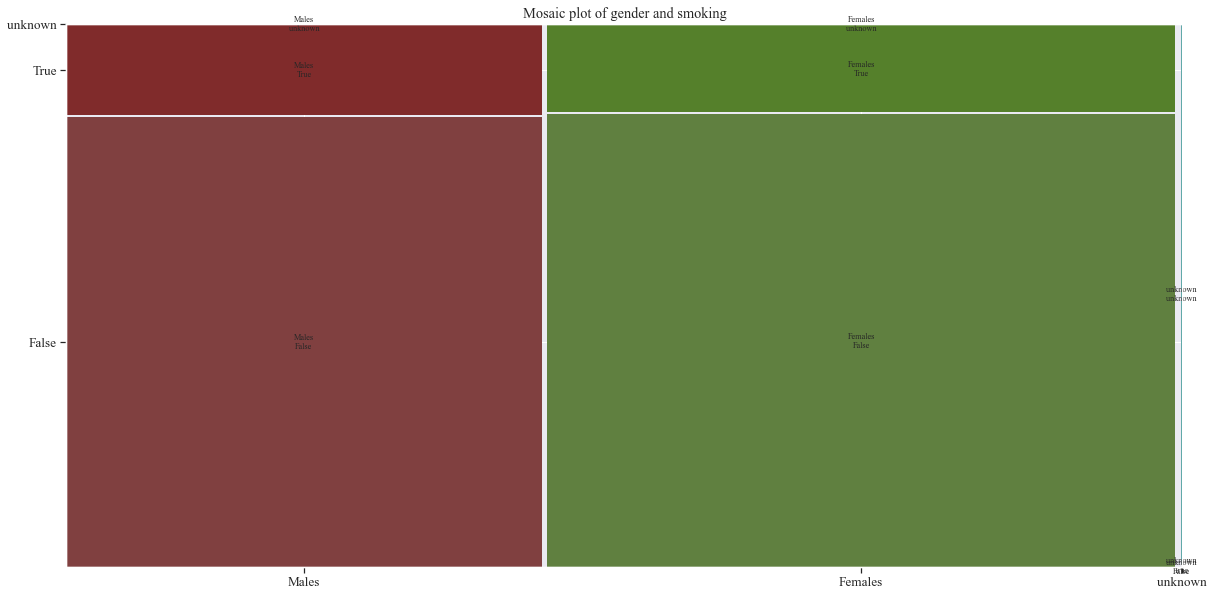

<Figure size 576x432 with 0 Axes>

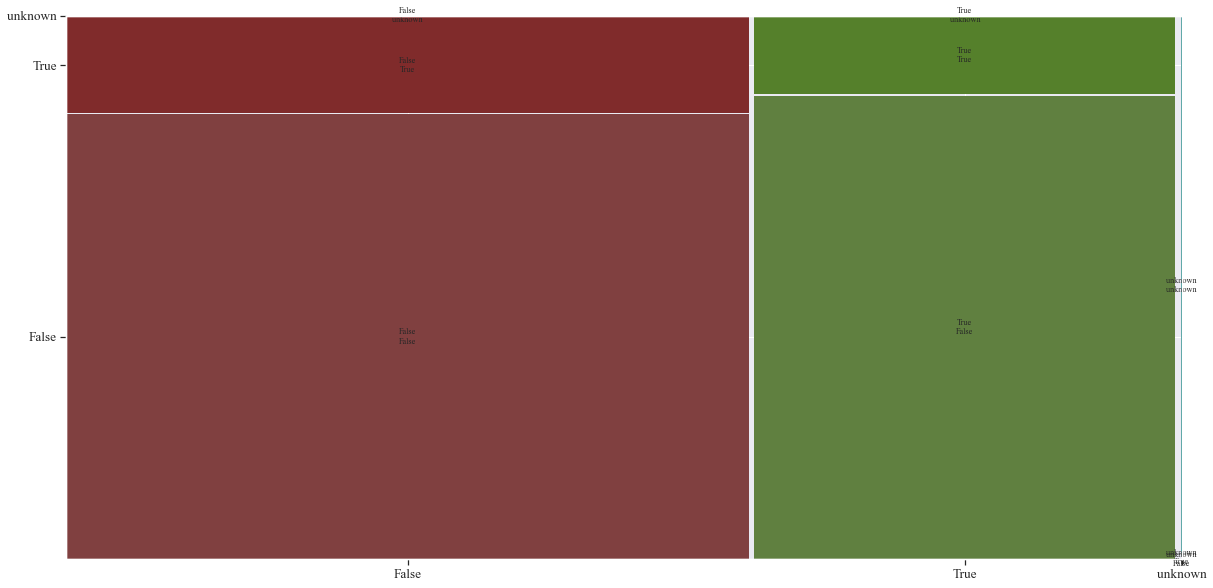

<Figure size 576x432 with 0 Axes>

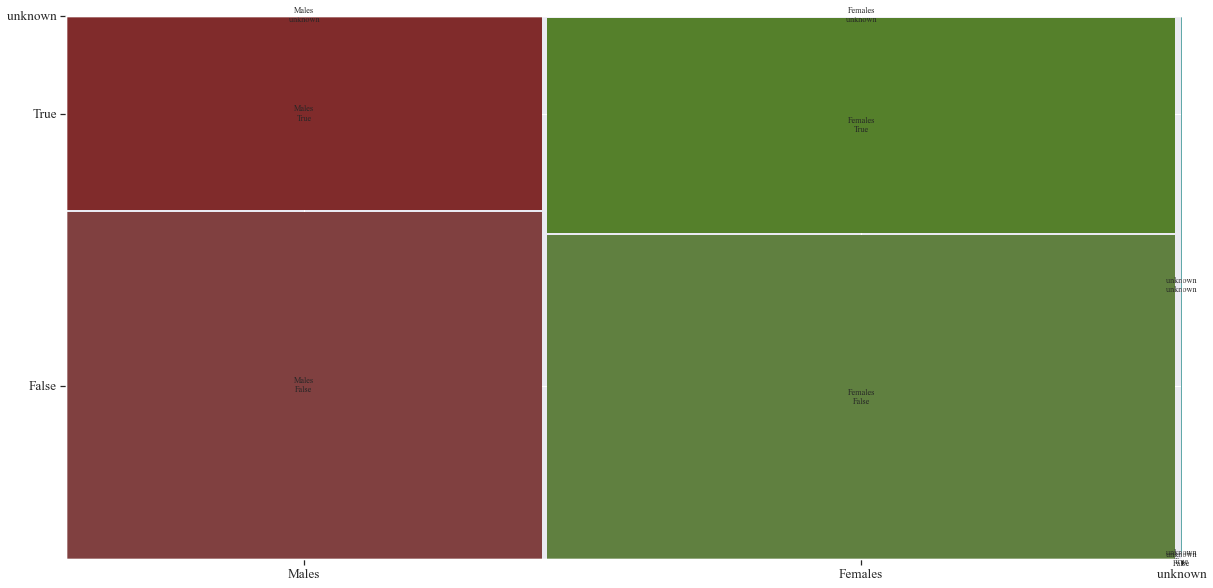

<Figure size 576x432 with 0 Axes>

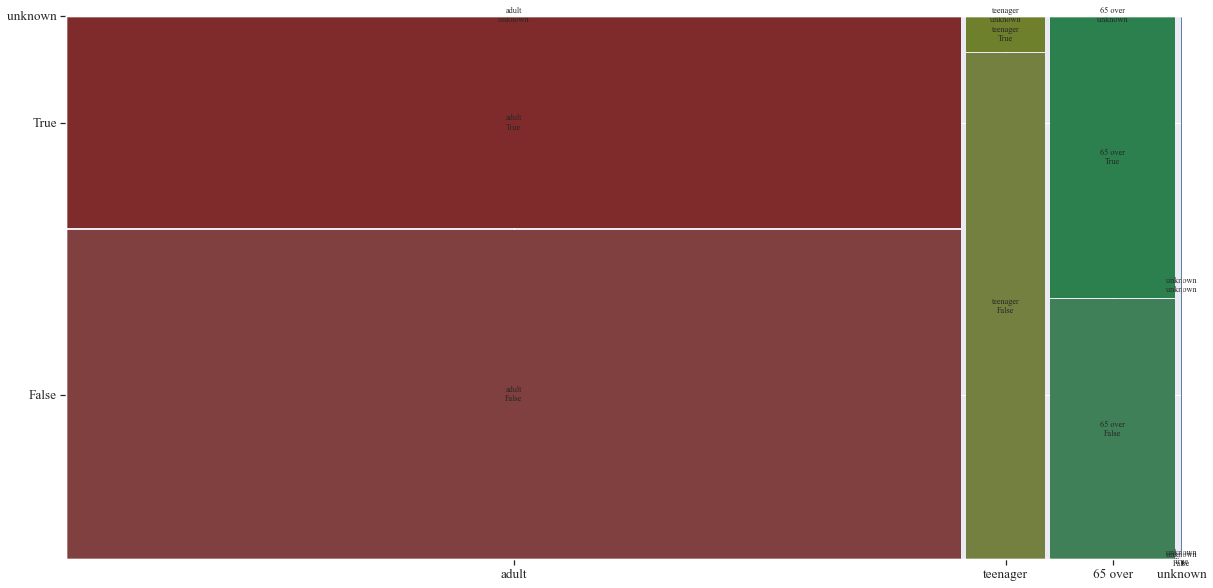

<Figure size 576x432 with 0 Axes>

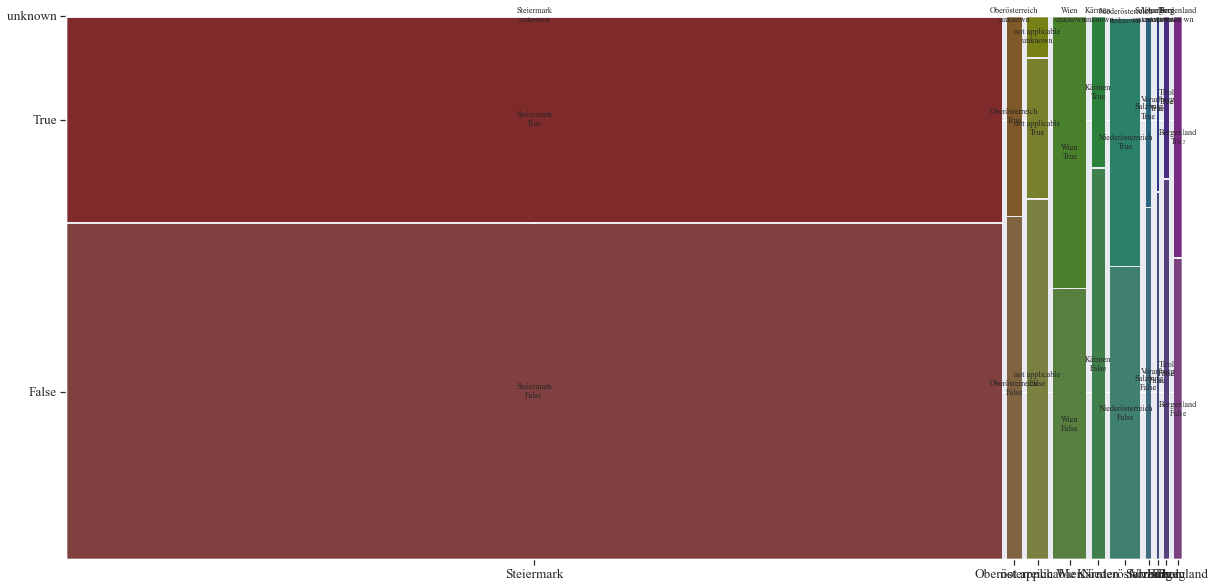

In [89]:

from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot gender smoking
df_m = pd.concat([data_df['geschlecht'], data_df['raucher']], axis=1, keys=['geschlecht', 'raucher'])
df_m['geschlecht'] = df_m['geschlecht'].replace('f', 'Females')
df_m['geschlecht'] = df_m['geschlecht'].replace('m', 'Males')

df_m['raucher'] = df_m['raucher'].replace(False, 'nom-smoking')
df_m['raucher'] = df_m['raucher'].replace(True, 'smoking')

plt.figure(figsize=(8,6))

mosaic(df_m, ['geschlecht', 'raucher'], title='Mosaic plot of gender and smoking')

plt.savefig(os.path.join(PLOT_DIR_NAME, "Mosaic_gender_smoking.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# Mosaic plot cholesterin smoking
df_m = pd.concat([data_df['cholesterin_bekannt'], data_df['raucher']], axis=1, keys=['cholesterin_bekannt', 'raucher'])
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(False, 'no-diabets')
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(True, 'diabets')

df_m['raucher'] = df_m['raucher'].replace(False, 'nom-smoking')
df_m['raucher'] = df_m['raucher'].replace(True, 'smoking')

plt.figure(figsize=(8,6))

mosaic(df_m, ['cholesterin_bekannt', 'raucher'])

plt.savefig(os.path.join(PLOT_DIR_NAME, "Mosaic_diabets_smoking.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# Mosaic plot cholesterin smoking
df_m = pd.concat([data_df['geschlecht'], data_df['cholesterin_bekannt']], axis=1, keys=['geschlecht', 'cholesterin_bekannt'])
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(False, 'no-diabets')
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(True, 'diabets')

df_m['geschlecht'] = df_m['geschlecht'].replace('f', 'Females')
df_m['geschlecht'] = df_m['geschlecht'].replace('m', 'Males')

plt.figure(figsize=(8,6))

mosaic(df_m, ['geschlecht', 'cholesterin_bekannt'])

plt.savefig(os.path.join(PLOT_DIR_NAME, "Mosaic_gender_diabets.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# Mosaic plot age-group smoking
df_m = pd.concat([data_df['age_group'], data_df['cholesterin_bekannt']], axis=1, keys=['age_group', 'cholesterin_bekannt'])
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(False, 'no-diabets')
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(True, 'diabets')

plt.figure(figsize=(8,6))

mosaic(df_m, ['age_group', 'cholesterin_bekannt'])
plt.savefig(os.path.join(PLOT_DIR_NAME, "Mosaic_age_group_diabets.pdf"), dpi=180, bbox_inches='tight')
plt.show()


# Mosaic plot cholesterin area
df_m = pd.concat([data_df['bundesland'], data_df['cholesterin_bekannt']], axis=1, keys=['bundesland', 'cholesterin_bekannt'])
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(False, 'no-diabets')
df_m['cholesterin_bekannt'] = df_m['cholesterin_bekannt'].replace(True, 'diabets')

plt.figure(figsize=(8,6))

mosaic(df_m, ['bundesland', 'cholesterin_bekannt'])

plt.savefig(os.path.join(PLOT_DIR_NAME, "Mosaic_area_diabets.pdf"), dpi=180, bbox_inches='tight')
plt.show()




Correlation

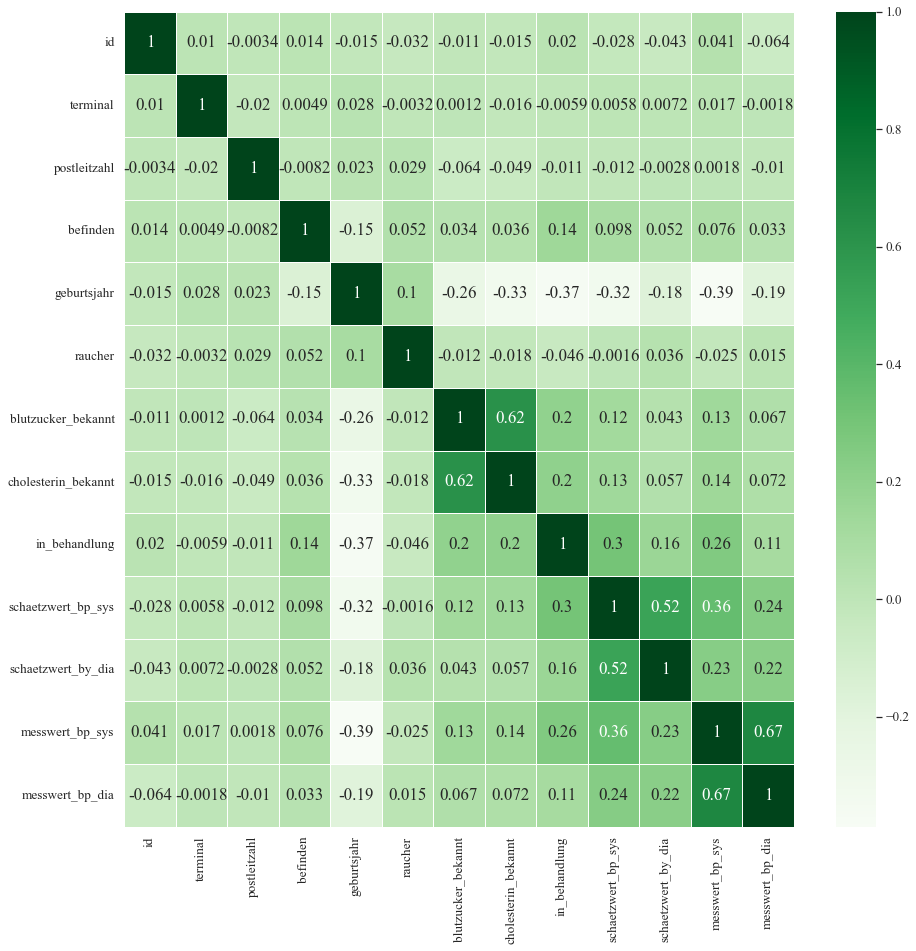

In [48]:

cols = ['id', 'terminal', 'postleitzahl', 'befinden', 'geburtsjahr', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia']
correlation_matrix = data_df[cols].corr()
fig, ax = plt.subplots(figsize=(15,15))     
plot = sns.heatmap(correlation_matrix, annot = True, linewidths=.5, ax=ax, cmap="Greens")

plt.show()

plot.figure.savefig(os.path.join(PLOT_DIR_NAME, "corr_matrix.pdf"), dpi=180, bbox_inches='tight')

Scatter Plots

Index(['schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

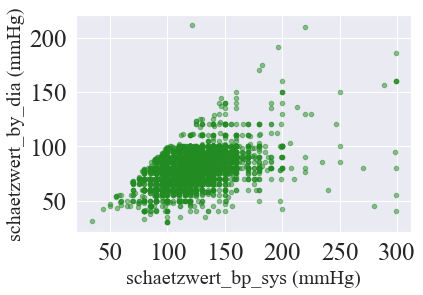

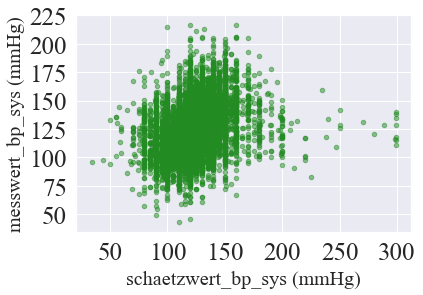

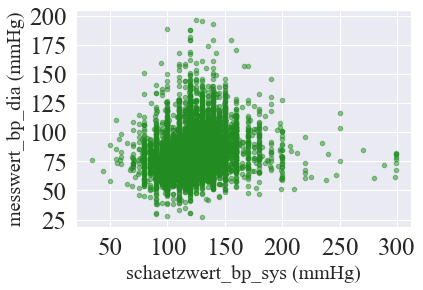

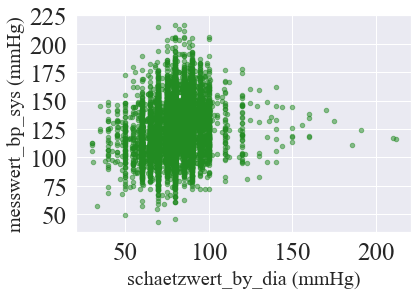

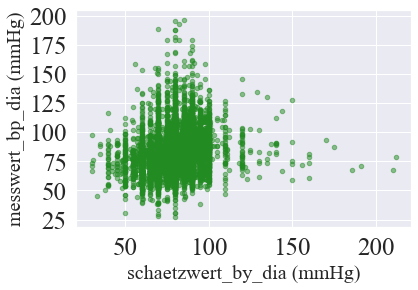

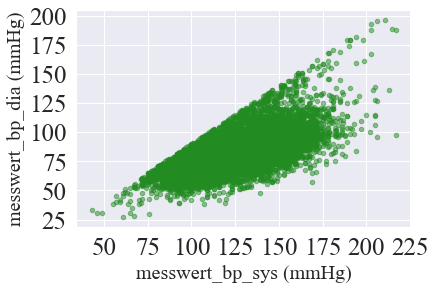

In [60]:


df_new = data_df.iloc[:, 14:18]
df_new.head()
print(df_new.columns)
col_list = list(df_new.columns)

plt.figure()
for i in range(len(col_list)):
    for j in range(i+1, len(col_list)):
        plot = df_new.plot.scatter(col_list[i], col_list[j], label=f'{col_list[i]} vs {col_list[j]}',color=PLOT_COLOR, alpha=0.5)
        plt.xlabel(col_list[i] + " (mmHg)", fontsize=20)
        plt.ylabel(col_list[j] + " (mmHg)", fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plot.get_legend().remove()
        plot.figure.savefig(os.path.join(PLOT_DIR_NAME,col_list[i] +  "_vs_" + col_list[j] + ".pdf"), bbox_inches='tight')


plt.show()